<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [2]:
import pandas as pd
import psycopg2

import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
import requests
from bs4 import BeautifulSoup

import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

В данном проекте мы будем рассматривать создание модели машинного обучения, которая будет рекомендовать вакансии клиентам агентства, претендующим на позицию Data Scientist. В дальнейшем данная модель может быть улучшена для поиска вакансий по любой другой позиции.

In [4]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [5]:
# текст запроса
query_3_1 = f'''
SELECT 
    count(id)
FROM vacancies
'''

In [6]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

/tmp/ipykernel_4042906/1114379196.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [7]:
# текст запроса
query_3_2 = f'''
SELECT 
    count(id)
FROM employers
'''

In [8]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

/tmp/ipykernel_4042906/3062646138.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [9]:
# текст запроса
query_3_3 = f'''
SELECT 
    count(id)
FROM areas
'''

In [10]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

/tmp/ipykernel_4042906/928149064.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [11]:
# текст запроса
query_3_4 = f'''
SELECT 
    count(id)
FROM industries
'''

In [12]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

/tmp/ipykernel_4042906/2101691108.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

### Выводы по предварительному анализу данных
По предварительным результатам можно сказать, что обхват нашей базы данных достаточно большой: в ней собрано множество данных по исследуемым признакам(регионы, сферы деятельности, работодатели и вакансии). Поэтому можно ожидать исчерпывающих ответов на любые поставленные вопросы.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
# текст запроса
query_4_1 = f'''
SELECT DISTINCT
    a.name "Город",
    count(v.id) "Кол-во вакансий"
FROM areas a
    JOIN vacancies v ON v.area_id = a.id
GROUP BY a.id
ORDER BY 2 DESC
LIMIT 5
'''

In [14]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

/tmp/ipykernel_4042906/2457173557.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


,Город,Кол-во вакансий
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# текст запроса
query_4_2 = f'''
SELECT 
    count(id) "Количество вакансий, где заполнено хотя бы одно поле с ЗП"
FROM vacancies
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''

In [16]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

/tmp/ipykernel_4042906/970655580.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,"Количество вакансий, где заполнен"
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса
query_4_3 = f'''
SELECT 
    round(AVG(salary_from),0) "Среднее нижнее",
    round(AVG(salary_to),0) "Среднее верхнее"
FROM vacancies
'''

In [18]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

/tmp/ipykernel_4042906/2500607024.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,Среднее нижнее,Среднее верхнее
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса
query_4_4 = f'''
SELECT DISTINCT
    schedule "Рабочий график",
    employment "Тип трудоустройства",
    count(id) "Кол-во вакансий"
FROM vacancies
GROUP BY schedule, employment
ORDER BY 3 DESC
'''

In [20]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

/tmp/ipykernel_4042906/2022935265.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


,Рабочий график,Тип трудоустройства,Кол-во вакансий
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


Text(0.5, 1.0, 'Количество вакансий для каждого сочетания типа рабочего графика и типа трудоустройства.')

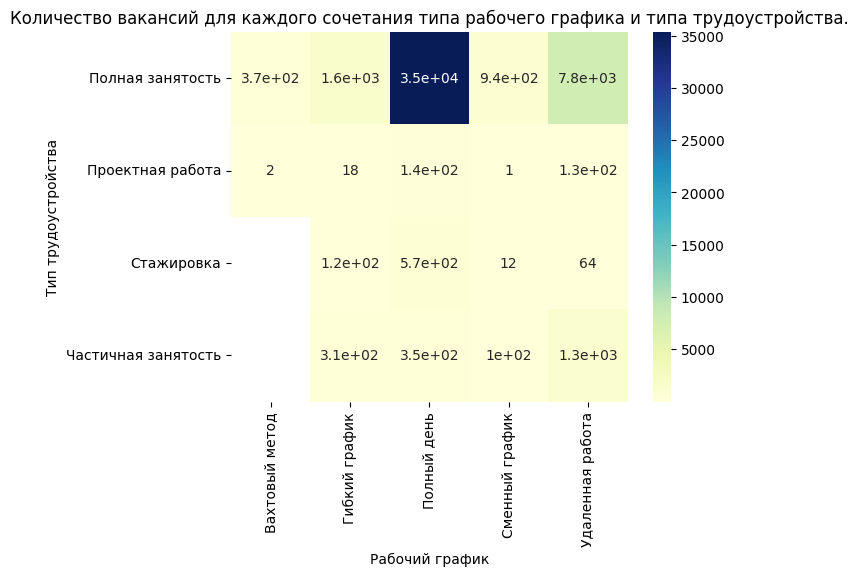

In [21]:
pivot = df.pivot_table(
    values='Кол-во вакансий',
    columns='Рабочий график',
    index='Тип трудоустройства'
)
pivot.columns = pivot.columns.astype('string')
#display(pivot)

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu',annot=True)
heatmap.set_title('Количество вакансий для каждого сочетания типа рабочего графика и типа трудоустройства.')

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [22]:
# текст запроса
query_4_5 = f'''
SELECT DISTINCT
    experience "Опыт",
    count(id) "Кол-во вакансий"
FROM vacancies
GROUP BY experience
ORDER BY 2
'''

In [23]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

/tmp/ipykernel_4042906/2316260449.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


,Опыт,Кол-во вакансий
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


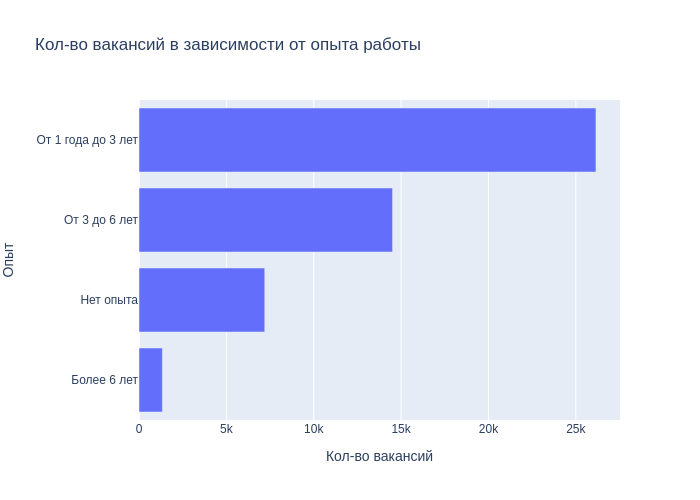

In [24]:
fig = px.bar(
    data_frame = df,
    x='Кол-во вакансий',
    y='Опыт',
    title='Кол-во вакансий в зависимости от опыта работы'
)

fig.show("png")

***

### Выводы по детальному анализу вакансий

* В результате более расширенного анализа мы выяснили, что половина вакансий вывешены без указания уровня ЗП. 
* Подавляющее большинство вакансий ориентированы на полную занятость с полным рабочим днём. В качестве небольшой альтернативы можно рассматривать полную занятость вкупе с удалёнкой. 
* Большинство соискателей имеют опыт работы от года до трёх. На следующем месте идут соискатели с опытом от трёх до шести лет. Это объясняется тем, что в большинстве случаев программисту хватает периода до трёх лет, чтоб полностью освоится на текущем уровне и иметь достаточно знаний, чтоб идти дальше.
* Нижняя и верхняя границы ЗП соответственно равны: 71 065 р. и	110 537 р.
* Большая часть вакансий расположены в крупных городах. Это связано с более высоким уровнем жизни в больших городах.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [25]:
# текст запроса
query_5_1 = f'''
(SELECT DISTINCT
    e.name "Работодатель",
    count(v.id) "Вакансии"
FROM employers e
    JOIN vacancies v ON v.employer_id = e.id
GROUP BY e.id
ORDER BY 2 DESC
LIMIT 1)

UNION

(SELECT DISTINCT
    e.name "Работодатель",
    count(v.id) "Вакансии"
FROM employers e
    JOIN vacancies v ON v.employer_id = e.id
GROUP BY e.id
ORDER BY 2 DESC
OFFSET 4
LIMIT 1)
'''

In [26]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

/tmp/ipykernel_4042906/3834399874.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Работодатель,Вакансии
0,Газпром нефть,331
1,Яндекс,1933


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [27]:
# текст запроса, который для каждого региона выведет количество работодателей и вакансий в нём.
query_5_2_1 = f'''
SELECT DISTINCT
    a.name "Регион",
    count(DISTINCT e.id) "Работодатели",
    count(v.id) "Вакансии"
FROM areas a
    JOIN vacancies v ON v.area_id = a.id
    JOIN employers e ON e.id = v.employer_id
GROUP BY a.id
ORDER BY 2 DESC
'''

In [28]:
# результат запроса
df = pd.read_sql_query(query_5_2_1, connection)
df

/tmp/ipykernel_4042906/3637954458.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Регион,Работодатели,Вакансии
0,Москва,2320,5333
1,Санкт-Петербург,1451,2851
2,Минск,851,2112
3,Новосибирск,802,2006
4,Алматы,798,1892
...,...,...,...
764,Электроугли,1,1
765,Эртиль,1,1
766,Юрга,1,1
767,Яблоновский (Республика Адыгея),1,2


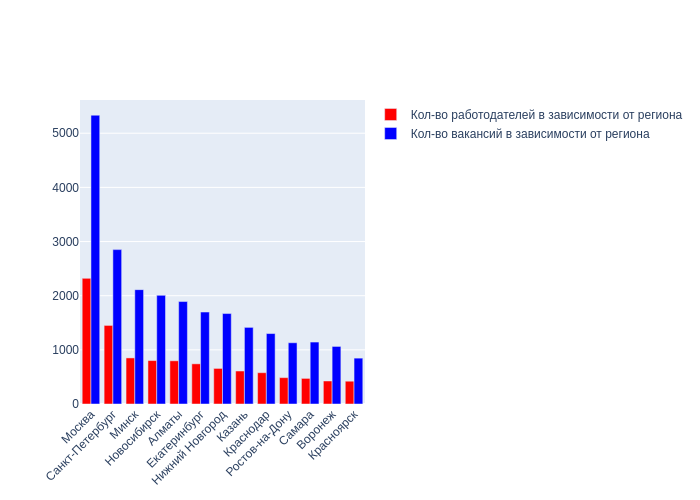

In [29]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df[df['Работодатели']>400]['Регион'],
    y=df['Работодатели'],
    marker_color='red',
    name='Кол-во работодателей в зависимости от региона'
))
fig.add_trace(go.Bar(
    x=df[df['Работодатели']>400]['Регион'],
    y=df['Вакансии'],
    marker_color='blue',
    name='Кол-во вакансий в зависимости от региона'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show("png")

In [30]:
# текст предыдущего запроса, который мы усовершенствовали тем, что теперь ищем самый богатый работодателями регион, в котором нет вакансий
query_5_2_2 = f'''
SELECT DISTINCT
    a.name "Регион",
    count(e.id) "Работодатели"
FROM areas a
    LEFT JOIN vacancies v ON v.area_id = a.id
    LEFT JOIN employers e ON e.area = a.id
WHERE v.id is NULL
GROUP BY a.id
ORDER BY 2 DESC
'''

In [31]:
# результат запроса
df = pd.read_sql_query(query_5_2_2, connection)
df

/tmp/ipykernel_4042906/1406114634.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Регион,Работодатели
0,Россия,410
1,Казахстан,207
2,Московская область,75
3,Краснодарский край,19
4,Беларусь,18
...,...,...
588,Юрюзань,0
589,Ямбург (Ямало-Ненецкий АО),0
590,Янино-1,0
591,Ясный (Оренбургская область),0


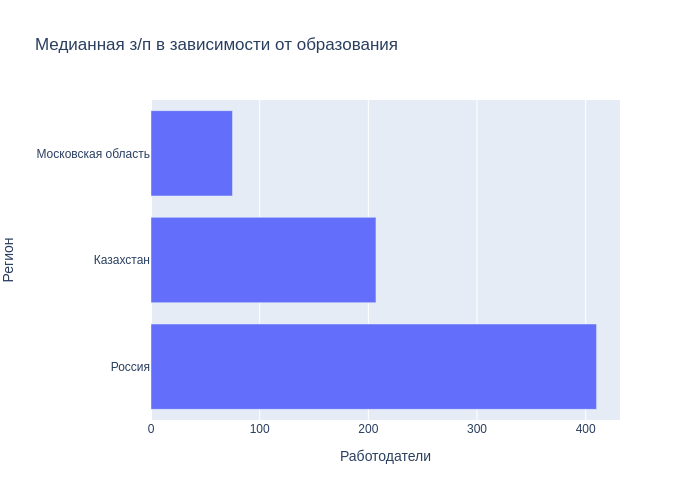

In [32]:
fig = px.bar(
    data_frame = df[df['Работодатели'] > 50],
    y='Регион',
    x='Работодатели',
    title='Медианная з/п в зависимости от образования'
)

fig.show("png")

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [33]:
# текст запроса
query_5_3 = f'''
SELECT DISTINCT
    e.name "Работодатель",
    count(DISTINCT a.id) "Регионы"
FROM employers e
    LEFT JOIN vacancies v ON v.employer_id = e.id
    LEFT JOIN areas a ON v.area_id = a.id
GROUP BY e.id
ORDER BY 2 DESC
'''

In [34]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

/tmp/ipykernel_4042906/201667002.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Работодатель,Регионы
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23336,Ярпож Казань,0
23337,ЯРСНИП,0
23338,Ясли-сад № 28 г.Минска,0
23339,Яшин&Партнёры,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [35]:
# текст запроса
query_5_4 = f'''
SELECT DISTINCT
    count(e.id) "Кол-во работодателей"
FROM employers e
    LEFT JOIN employers_industries ei ON ei.employer_id = e.id
GROUP BY ei.industry_id
HAVING ei.industry_id IS NULL
'''

In [36]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

/tmp/ipykernel_4042906/3493105328.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Кол-во работодателей
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [37]:
# текст запроса
query_5_5 = f'''
SELECT DISTINCT
    e.name
FROM employers e
    LEFT JOIN employers_industries ei ON ei.employer_id = e.id
GROUP BY e.id
HAVING count(ei.industry_id) = 4
ORDER BY 1 ASC
OFFSET 2
LIMIT 1
'''

In [38]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

/tmp/ipykernel_4042906/388711819.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана "Разработка программного обеспечения".


In [39]:
# текст запроса
query_5_6 = f'''
SELECT 
    count(DISTINCT ei.employer_id)
FROM 
    employers_industries ei
    JOIN industries i ON ei.industry_id = i.id
WHERE i.name LIKE 'Разработка программного обеспечения'
'''

In [40]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

/tmp/ipykernel_4042906/821628714.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [41]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')
all_tables = page.find_all('table')
table_cities = all_tables[1]
list_cities = [] #список городов-милионников

for i in table_cities.find_all('td'): 
    title = i.text  
    list_cities.append(title) 
list_cities = list_cities[1::5]

list_cities[13] = 'Воронеж'
print(list_cities)


['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград']


In [42]:
# текст запроса
query_5_7 = f'''
(SELECT DISTINCT
    a.name "Регион",
    count(v.id) "Кол-во вакансий"
FROM 
    vacancies v
    JOIN areas a ON a.id = v.area_id
    JOIN employers e ON e.id = v.employer_id
WHERE e.name LIKE 'Яндекс' AND (a.name IN ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград'))
GROUP BY a.name 
ORDER BY 2 ASC)

UNION

(SELECT DISTINCT
    'Total' "Регион",
    count(v.id) "Кол-во вакансий"
FROM 
    vacancies v
    JOIN areas a ON a.id = v.area_id
    JOIN employers e ON e.id = v.employer_id
WHERE e.name LIKE 'Яндекс' AND (a.name IN {tuple(list_cities)})
ORDER BY 2 ASC)
ORDER BY 2 ASC
'''

In [43]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
display(df.shape)
df

/tmp/ipykernel_4042906/802678966.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



(17, 2)

,Регион,Кол-во вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

### Выводы по анализу работодателей

* Самой независимой от географии кампанией является Яндекс. Именно эта кампания имеет больше всего вакансий для Data Scientist'а, а так же вакансии этой кампании размещены в большинстве регионов. 
* Из общего количества работодателей примерно у трети не указана сфера деятельности.
* И где-то у 1/7 всех кампаний в качестве сферы деятельности указана разработка ПО.
* В ходе анализа количества вакансий для компании «Яндекс» в зависимости от города было выявлено, что чем крупнее город, тем больше в нём вакансий кампании.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [44]:
# текст запроса
query_6_1 = f'''
SELECT 
    count(DISTINCT id)
FROM vacancies
WHERE name ILIKE '%данн%' OR name ILIKE '%data%'
'''

In [45]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

/tmp/ipykernel_4042906/366702258.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [46]:
# текст запроса
ds_vacs = '{%data scientist%, %data science%, %исследователь данных%, %machine learning%, %машинн%обучен%}'
query_6_2 = f'''
SELECT 
    count(id)
FROM vacancies
WHERE ((name ILIKE ANY ('{ds_vacs}') OR name LIKE '%ML%') AND name NOT ILIKE '%HTML%')
    AND (name ILIKE '%junior%' OR experience ILIKE '%Нет опыта%' OR employment ILIKE '%Стажировка%')
'''

In [47]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

/tmp/ipykernel_4042906/2267038862.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [48]:
# текст запроса
skills = '{%SQL%, %postgres%}'
query_6_3 = f'''
SELECT 
    count(id)
FROM vacancies
WHERE ((name ILIKE ANY ('{ds_vacs}') OR name LIKE '%ML%') AND name NOT ILIKE '%HTML%')
    AND (key_skills ILIKE ANY ('{skills}'))
'''

In [49]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

/tmp/ipykernel_4042906/3794299702.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [50]:
# текст запроса
skills = '{%Python%}'
query_6_4 = f'''
SELECT 
    count(id)
FROM vacancies
WHERE ((name ILIKE ANY ('{ds_vacs}') OR name LIKE '%ML%') AND name NOT ILIKE '%HTML%')
    AND (key_skills ILIKE ANY ('{skills}'))
'''

In [51]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

/tmp/ipykernel_4042906/4264665179.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [52]:
# текст запроса
query_6_5 = f'''
SELECT 
    round(AVG(length(key_skills) - length(replace(key_skills, chr(9), '')) + 1),2) "среднее кол-во вакансий"
FROM vacancies
WHERE ((name ILIKE ANY ('{ds_vacs}') OR name LIKE '%ML%') AND name NOT ILIKE '%HTML%')
'''

In [53]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

/tmp/ipykernel_4042906/3654210517.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,среднее кол-во вакансий
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [54]:
# текст запроса
# Здесь мы используем coalesce. Функция возвращает первый аргумент, который не равен null. Т.к. (1+null)=null, поэтому мы сначала проверяем на то, что оба значения ЗП не null, потом каждое, иначе возвращаем 0.
query_6_6 = f'''
SELECT 
    experience "Опыт",
    round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to)), 0) "Средняя З/П" 
FROM vacancies
WHERE ((name ILIKE ANY ('{ds_vacs}') OR name LIKE '%ML%') AND name NOT ILIKE '%HTML%')
GROUP BY experience
'''

In [55]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df

/tmp/ipykernel_4042906/519194770.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Опыт,Средняя З/П
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,139675.0
3,От 3 до 6 лет,243115.0


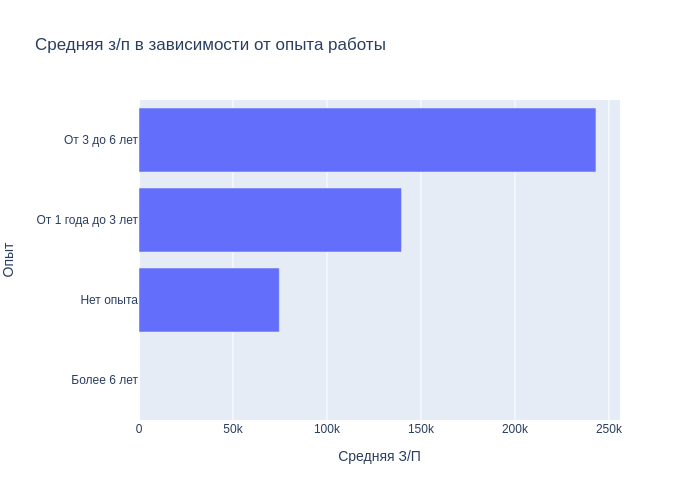

In [56]:
fig = px.bar(
    data_frame = df,
    x='Средняя З/П',
    y='Опыт',
    title='Средняя з/п в зависимости от опыта работы'
)

fig.show("png")

***

### Выводы по предметному анализу

* Из 49 тысяч вакансий только 1771 вакансия имеет отношение к данным(примерно 1/28 всех вакансий).
* Из 1771 вакансий для начинающих дата-сайентистов подойдёт только 51 вакансия.
* В среднем работодатели указывают по 6-7 ключевых навыков, поэтому только лишь знаний SQL, postgres и Python может не хватить для быстрого и вариативного поиска работы. Следует развиваться во многих направлениях помимо базы, чтоб стать востребованным специалистом.
* Если иметь навыки самостоятельного развития, то после нахождения вашей первой работы в качестве дата-сайентиста и обзавестись опытом работы 3-6 лет, то вы в среднем сможете расчитывать на З/П уровня 243 тысячи.

# Общий вывод по проекту

### Подведем итог исследования, обобщите выводы
* В данный момент профессия дата-сайентиста только набирает популярность. Скорее всего в будущем она будет очень полезна, т.к. мы всё чаще и чаще сталкиваемся с необходимость работы с большими объёмами информации.
* В данный момент большинство вакансий находится в крупных городах из-за большого количества графиков с полным рабочим днём в офисе. Если в будущем произойдут какие-то важные события, то возможно актуальный тип рабочего графика изменится.
* В данный момент достаточно проблематично будет искать работу по специальности для студентов старших курсов из-за чрезвычайно малого количества вакансий для людей без опыта работы, а так же учитывая рабочий график.
### здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

### Дополнительное исследование: "Анализ ключевых навыков для самых популярных вакансий"

In [57]:
query_7_1 = f'''
CREATE OR REPLACE FUNCTION textsum_helper(a text, b text) RETURNS text AS $$
        BEGIN
                RETURN CASE WHEN a = '' THEN b ELSE concat_ws(', ', a, b) END;
        END;
$$ LANGUAGE plpgsql;

CREATE AGGREGATE sum (text)
(
    sfunc = textsum_helper,
    stype = text,
    initcond = ''
);

SELECT DISTINCT
    name "Вакансия",
    count(id) "Количество",
    REPLACE(SUM(key_skills), '\t',', ') "Ключевые навыки"
FROM vacancies
GROUP BY name
HAVING count(id) > 100
ORDER BY 2 DESC
'''

In [58]:
df = pd.read_sql_query(query_7_1, connection)
df

/tmp/ipykernel_4042906/2911634181.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Вакансия,Количество,Ключевые навыки
0,Системный администратор,1761,"Грамотная речь, Работа в команде, Ответственны..."
1,Программист 1С,1153,"1С программирование, 1С: Предприятие 8, Создан..."
2,Бизнес-аналитик,488,"SQL, Tableau, Power BI, Базы данных, Анализ да..."
3,Специалист технической поддержки,457,"Английский язык, SQL, Работа с базами данных, ..."
4,Системный аналитик,432,"SQL, DAX, Постановка задач разработчикам, BPMN..."
5,Аналитик,404,"Работа с базами данных, Работа с большим объем..."
6,Инженер-программист,389,"MS Visual Basic, Visual Basic, 1С программиров..."
7,Программист 1C,360,"1С: Предприятие 8, 1С: Бухгалтерия, 1С: Зарпла..."
8,Frontend-разработчик,242,"React, HTML, CSS, JS, MVC, ООП, react, JavaScr..."
9,Инженер технической поддержки,230,"Работа в команде, Техническая поддержка, MS Ou..."


### Дополнительное исследование: "Популярность различных навыков DS при поиске вакансий"

In [59]:
skills = '{%SQL%, %postgres%}'
query_7_2 = f'''
SELECT 
    REPLACE(SUM(key_skills), '\t',', ') "Ключевые навыки"
FROM vacancies
WHERE ((name ILIKE ANY ('{ds_vacs}') OR name LIKE '%ML%') AND name NOT ILIKE '%HTML%')
'''

In [66]:
df = pd.read_sql_query(query_7_2, connection)
df

skillsDict = {}

for word in df['Ключевые навыки'][0].split(', '):
    if word not in skillsDict.keys():
        skillsDict[word] = 1
    else:
        skillsDict[word] += 1
        
data = {'Навыки': skillsDict.keys(), 'Кол-во': skillsDict.values()}
 
#data 
skills_df = pd.DataFrame.from_dict(data)
skills_df = skills_df.sort_values(by=['Кол-во'], ascending=False)  


/tmp/ipykernel_4042906/3615460225.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



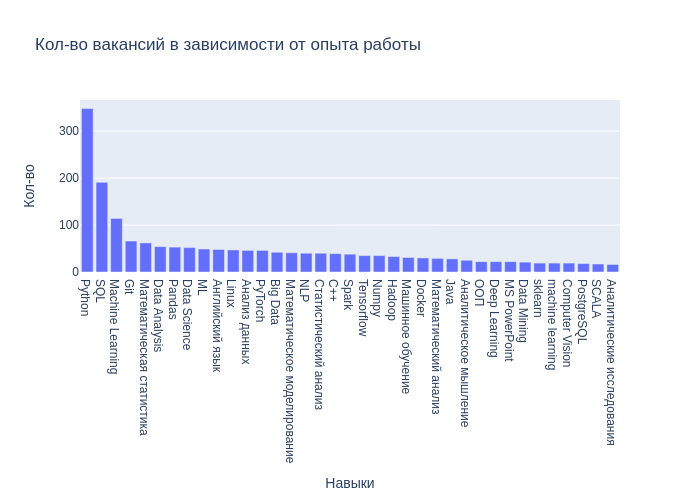

In [67]:
fig = px.bar(
    data_frame = skills_df[skills_df['Кол-во'] > 15],
    x='Навыки',
    y='Кол-во',
    title='Кол-во вакансий в зависимости от опыта работы'
)

fig.show("png")

### Выводы:

* Как видно из таблицы выше, умения дата-сайентиста могут полезны в большинстве отраслей, потому как анализ большого количества данных занимает всё больше и больше места в жизни человека. Поэтому в будущем эти дата-сайнтисты будут обязательными в большинстве отраслей. Знания дата-сайентиста, полученные на курсах, могут помочь не только в переходе в новую профессию, но так же и в усовершенствовании вашей текущей.

* Как видно из исследования навыков дата-сайнтиста, в большинстве случаев специалисту нужны Python, SQL, ML. Далее чаще всего встречаются Git, математическая статистика, Data analysis, Pandas, Data Science.

* Проведённое выше исследование можно использовать для обозревания рынка по любой необходимой профессии, чтоб получать актуальную информацию по любой специальности. 
* Совершая одинаковые выборки данных ежегодно можно пытаться сделать прогнозы развития профессии. При подключении дополнительных внешних факторов(геополитическая обстановка, уровень развития технологий, спциализация развивающихся технологий) можно пытаться сделать прогнозы какие типы сециалистов могут быть актуальны в будущем для своевременной подготовки кадров.

In [ ]:
connection.close()